<a href="https://colab.research.google.com/github/BitlaSravyaReddy/Slash_Mark_IT_Internship/blob/main/Dog-vs-cat-classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 218MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.8MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
!pip install tensorflow

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.callbacks import TensorBoard

In [7]:
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('/content/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),padding='valid',input_shape=(64,64,3),activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #if stride not given it equal to pool filter size

classifier.add(Conv2D(64,(3,3),padding='valid',activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

classifier.add(Conv2D(128,(3,3),padding='valid',activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1,activation='sigmoid'))
# adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))




In [10]:

history=classifier.fit_generator(train_set,steps_per_epoch=625,epochs = 25,validation_data = test_set,validation_steps = 20,)


Epoch 1/25
625/625 [==============================] - 227s 358ms/step - loss: 0.6345 - accuracy: 0.6599 - val_loss: 0.9409 - val_accuracy: 0.3438
Epoch 2/25
625/625 [==============================] - 223s 357ms/step - loss: 0.4904 - accuracy: 0.7640 - val_loss: 0.6106 - val_accuracy: 0.6609
Epoch 3/25
625/625 [==============================] - 220s 352ms/step - loss: 0.4211 - accuracy: 0.8069 - val_loss: 0.6560 - val_accuracy: 0.6125
Epoch 4/25
625/625 [==============================] - 223s 356ms/step - loss: 0.3704 - accuracy: 0.8318 - val_loss: 0.1792 - val_accuracy: 0.9281
Epoch 5/25
625/625 [==============================] - 220s 352ms/step - loss: 0.3385 - accuracy: 0.8515 - val_loss: 0.2926 - val_accuracy: 0.8766
Epoch 6/25
625/625 [==============================] - 218s 348ms/step - loss: 0.3095 - accuracy: 0.8674 - val_loss: 0.3908 - val_accuracy: 0.7937
Epoch 7/25
625/625 [==============================] - 221s 352ms/step - loss: 0.2879 - accuracy: 0.8784 - val_loss: 0.4564 -

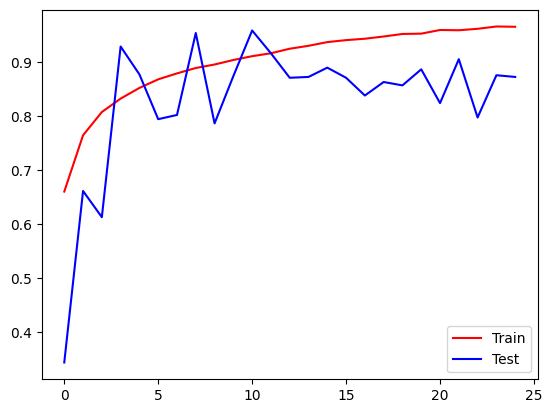

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Test')

plt.legend()
plt.show()


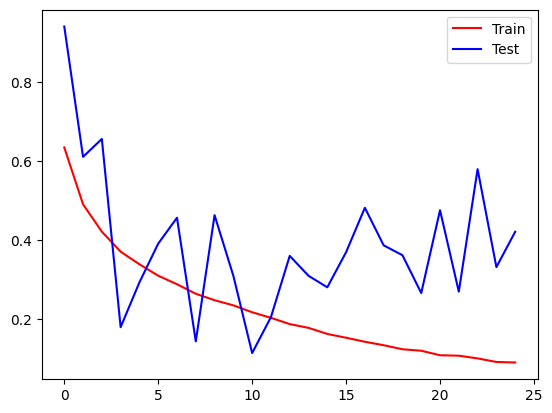

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Test')

plt.legend()
plt.show()

In [15]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [14]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 94.66%     Training loss  : 0.142617
Validation Accuracy: 86.50%     Validation loss: 0.431141
